In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.core.pylabtools import figsize
from IPython.display import Image # to render png from pydot inline
import pymc as pm

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
figsize(12.5, 3.5)
flip_data = np.loadtxt("data/z15N50.csv")

In [4]:
flip_data

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.])

In [5]:
len(flip_data)

50

In [6]:
flip_data.mean()

0.29999999999999999

<Container object of 50 artists>

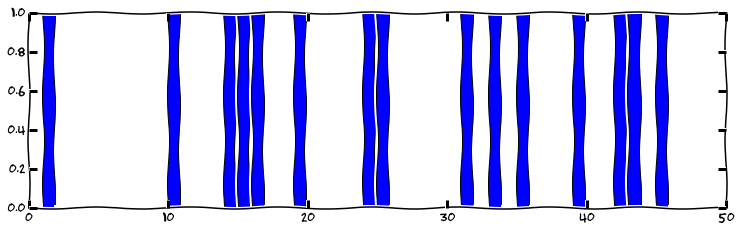

In [7]:
plt.xkcd()
plt.bar(np.arange(len(flip_data)), flip_data)

In [10]:
probs = pm.Beta("probs", 2, 2)

In [11]:
probs.random()

0.59452137558114071

In [12]:
obs = pm.Bernoulli("obs", p=probs, value=flip_data, observed=True)

In [13]:
model = pm.Model([obs, probs])

In [19]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 2.5 sec

In [20]:
probs_samples = mcmc.trace('probs')[:]

In [21]:
max(probs_samples)

0.56819343745476658

In [22]:
print len(probs_samples)
print probs_samples

30000
[ 0.23330501  0.23330501  0.23330501 ...,  0.30576564  0.30576564
  0.30576564]


(array([ 0.01118245,  0.03131086,  0.16997321,  0.44729793,  0.78724436,
         1.28598155,  2.0732259 ,  3.25185595,  4.05251924,  4.66531741,
         6.42319827,  6.08325184,  6.2219142 ,  6.16376547,  5.57780518,
         3.92951231,  4.65189847,  3.22501807,  2.55183469,  1.84063098,
         1.32400187,  0.94379863,  0.50991964,  0.36007483,  0.21023003,
         0.12077044,  0.11406097,  0.04472979,  0.01118245,  0.01118245]),
 array([ 0.12106416,  0.13596847,  0.15087278,  0.16577709,  0.1806814 ,
         0.19558571,  0.21049002,  0.22539432,  0.24029863,  0.25520294,
         0.27010725,  0.28501156,  0.29991587,  0.31482018,  0.32972449,
         0.3446288 ,  0.35953311,  0.37443742,  0.38934173,  0.40424604,
         0.41915035,  0.43405465,  0.44895896,  0.46386327,  0.47876758,
         0.49367189,  0.5085762 ,  0.52348051,  0.53838482,  0.55328913,
         0.56819344]),
 <a list of 1 Patch objects>)

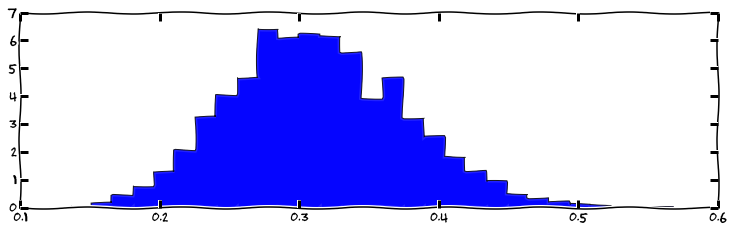

In [23]:
figsize(12.5, 3.5)
plt.hist(probs_samples, histtype='stepfilled', bins=30, alpha=0.85, normed=True)

In [22]:
probs.parents

{'alpha': 2, 'beta': 2}

In [23]:
obs.parents

{'p': <pymc.distributions.Beta 'probs' at 0x116118610>}

In [24]:
probs.children

{<pymc.distributions.Bernoulli 'obs' at 0x1102aba90>}

In [25]:
obs.children

set()

In [29]:
pm.Matplot.plot.mcplot(model)

AttributeError: 'function' object has no attribute 'mcplot'

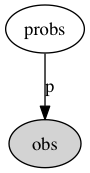

In [27]:
graph = pm.graph.graph(model)
Image(graph.create_png())